In [1]:
# Import the necessary libraries
import os.path
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import spacy
import scipy.sparse
from itertools import groupby
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, classification_report, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import spacy
from sklearn.model_selection import train_test_split
import nltk
import string
from nltk.stem.lancaster import LancasterStemmer
from collections import Counter
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ozgur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Read in the train, test, and sample submission data from the 'data' directory
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample = pd.read_csv('data/sample_submission.csv')
train1 = train

In [3]:
# Select all columns from the third column onwards in the train DataFrame
x=train.iloc[:,2:].sum()
rowsums=train.iloc[:,2:].sum(axis=1)

# Add a new column to the train DataFrame called 'nontoxic' that contains a boolean value indicating
# whether or not the comment is toxic
train['nontoxic']=(rowsums==0)

In [4]:
# Create a new column called "istoxic" in the "train" data frame
# if a value in the "nontoxic" column is True, the corresponding value in the
# "istoxic" column will be False, and vice versa
train['istoxic'] = ~train['nontoxic']
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,nontoxic,istoxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,True,False
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,True,False
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,True,False
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,True,False
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,True,False


In [5]:
# Display the first 10 rows of the "train" data frame using the head() method
train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,nontoxic,istoxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,True,False
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,True,False
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,True,False
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,True,False
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,True,False
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,True,False
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,False,True
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,True,False
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,True,False
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,True,False


In [6]:
# From now on data frame called "train" will contain only 
# the "id", "comment_text", and "istoxic" columns from the original "train" data frame
train = train[['id', 'comment_text', 'istoxic']]
train1 = train #To keep this DataFrame for another model
train.head(10)

,id,comment_text,istoxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,False
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,False
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",False
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",False
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",False
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",False
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,True
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,False
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,False
9,00040093b2687caa,alignment on this subject and which are contra...,False


## EDA

In [7]:
#Transforming all the words to lower case
toxic_comment = train[train['istoxic'] == 1]['comment_text'].str.lower()
nontoxic_comment = train[train['istoxic'] == 0]['comment_text'].str.lower()

In [8]:
#Transforming the comments to a list
toxic_comment = toxic_comment.values.tolist()
nontoxic_comment = nontoxic_comment.values.tolist()

In [9]:
#Tokenizing the words
toxic_comment_break = [nltk.tokenize.wordpunct_tokenize(text) for text in toxic_comment]
nontoxic_comment_break = [nltk.tokenize.wordpunct_tokenize(text) for text in nontoxic_comment]

In [10]:
#Deleting common English words
stopwords = nltk.corpus.stopwords.words('english')

In [11]:
#Defining a function to delete repeated characters in words
def clear_multiple_char(comment):        
    ti = []
    for words in comment:
        t = [''.join(["".join(i) for i, _ in groupby(word)]) if len(word)>10 else word for word in words]
        ti.append(t)
    return ti

In [12]:
toxic_comment_break = clear_multiple_char(toxic_comment_break)
nontoxic_comment_break = clear_multiple_char(nontoxic_comment_break)

In [13]:
#Eliminating punctuations and numbers
stemmer = LancasterStemmer()
punctuation = string.punctuation # '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# Add numbers
punctuation += '0123456789'

def comment_raiz(comment):
    text = []
    for lista in comment:
        valids = [stemmer.stem(word) for word in lista if word not in stopwords and word not in punctuation 
                  and len(word)>2]
        valids_true = [''.join([char for char in word if char not in punctuation]) for word in valids if 
                       len(''.join([char for char in word if char not in punctuation]))>0]
        text.append(valids_true)
    return text

In [14]:
toxic_comment_clear = comment_raiz(toxic_comment_break)
nontoxic_comment_clear = comment_raiz(nontoxic_comment_break)

In [15]:
#Define the function that counts number of occurance of each word in the comments
def counter(comment_clear):
    cnt = Counter()
    for words in comment_clear:
        for word in words:
            cnt[word] += 1
    return cnt

In [16]:
toxic_comment_cnt = counter(toxic_comment_clear)
nontoxic_comment_cnt = counter(nontoxic_comment_clear)

In [17]:
#Define the function that plots 20 most common words
def top_twenty(counts, label):
    most_common = collections.Counter(counts).most_common(20)
    words = [w for w,_ in most_common]
    counts = [c for _,c in most_common]
    plt.figure(figsize=(20, 10))
    ax = sns.barplot(x=words, y=counts, color='cyan')
    ax.set_title(f'Label = {label}', fontsize=15)
    ax.tick_params(labelsize=15)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

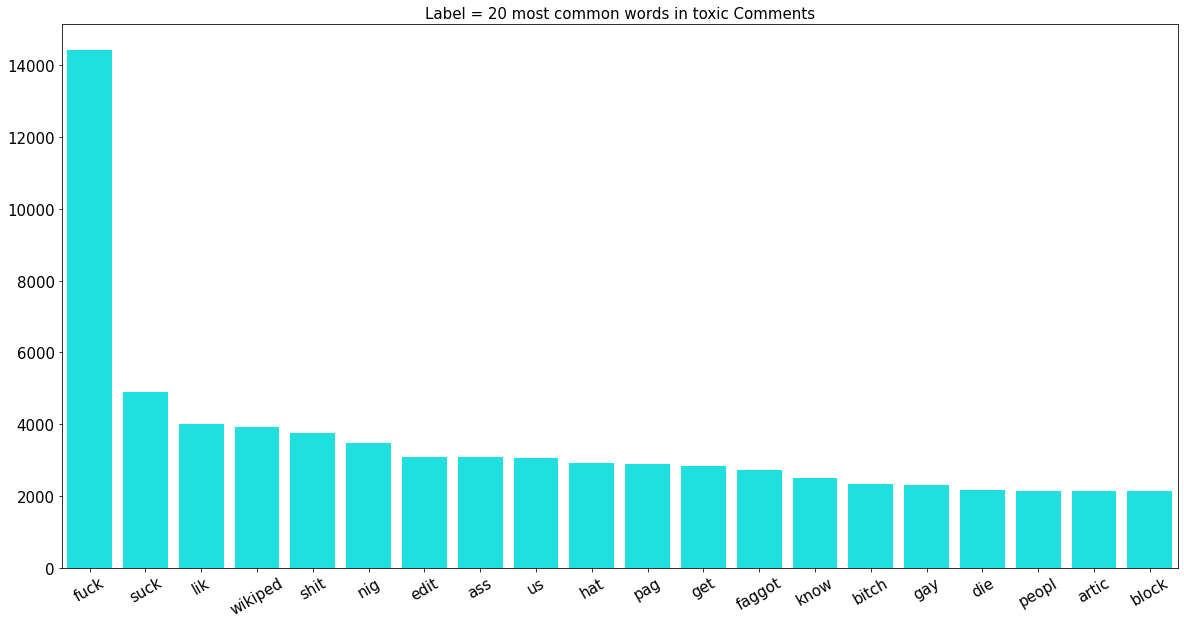

In [18]:
top_twenty(toxic_comment_cnt, label='20 most common words in toxic Comments')

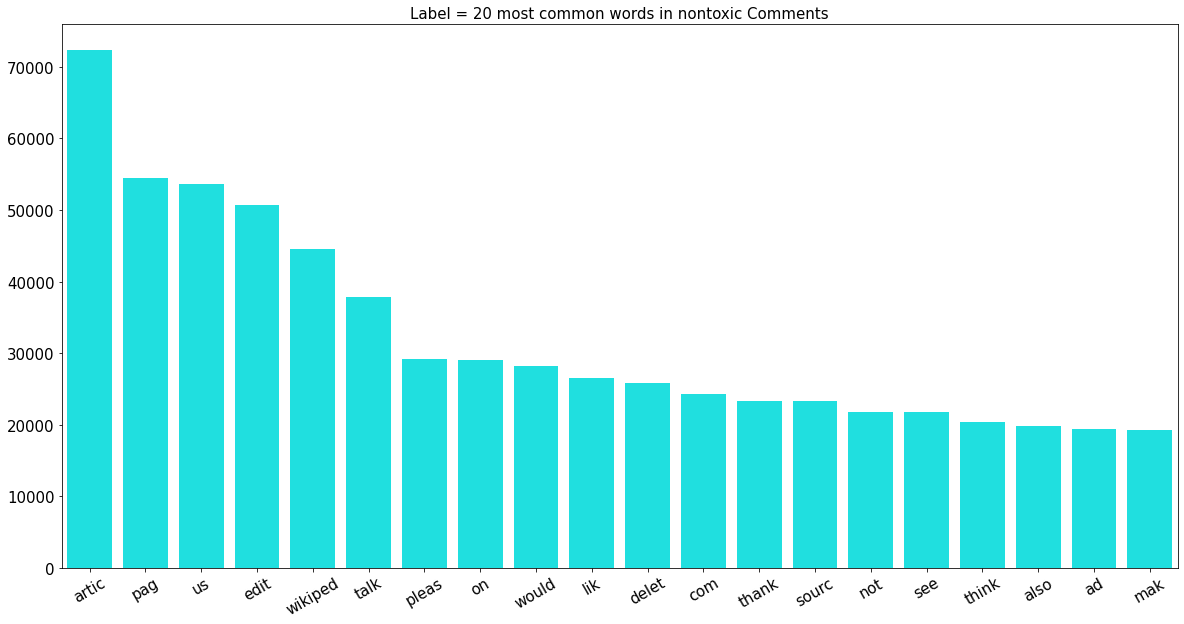

In [19]:
top_twenty(nontoxic_comment_cnt, label='20 most common words in nontoxic Comments')

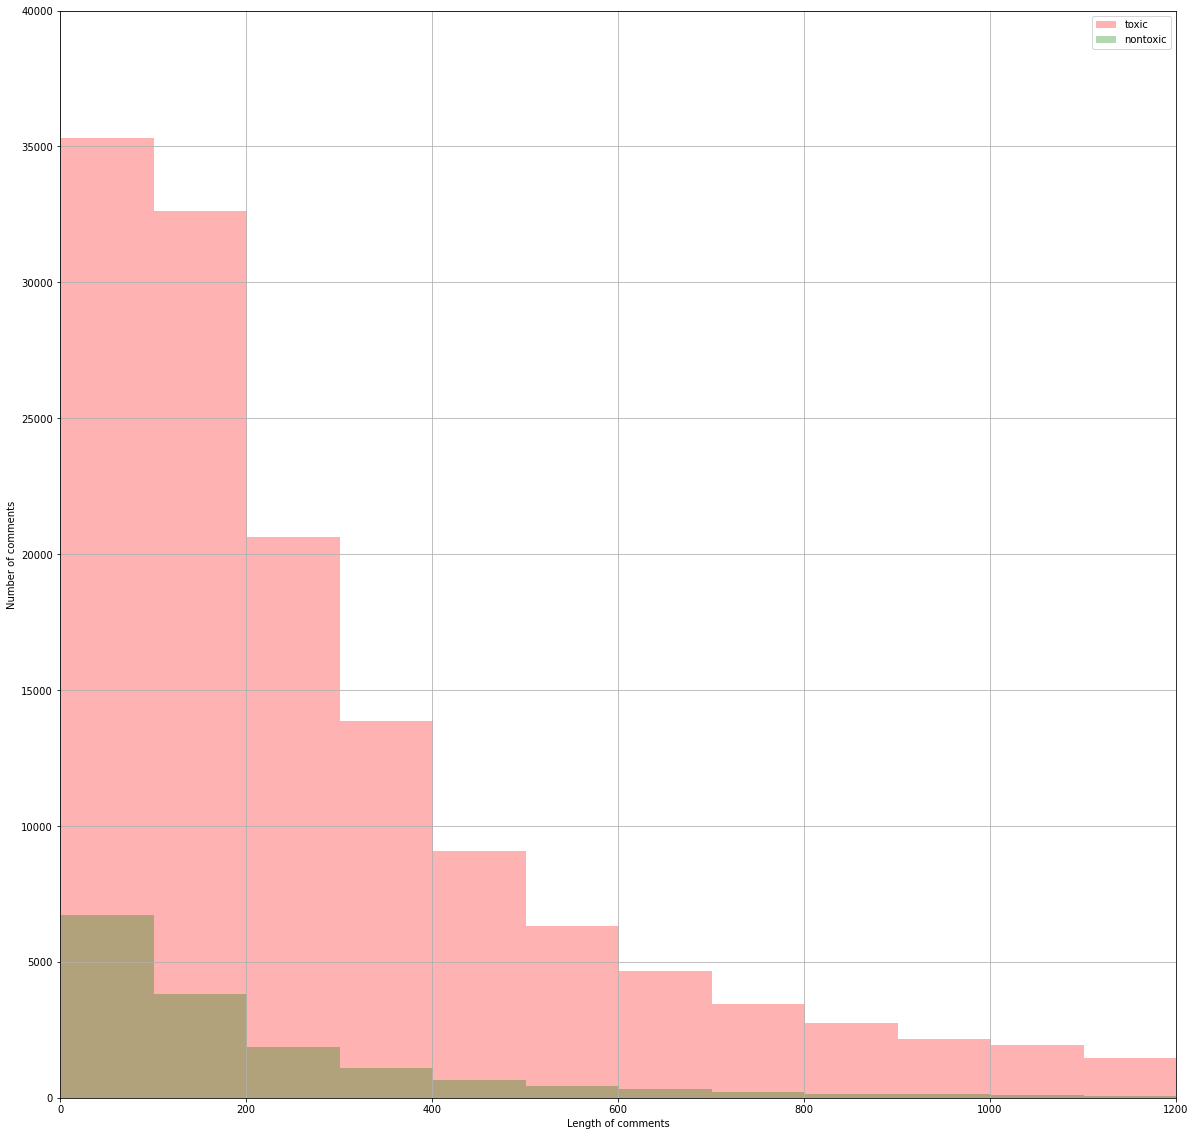

In [20]:
# Create the figure
plt.figure(figsize=(20,20))

# Get the data for the first plot
label = train[['istoxic']]
y = np.zeros(label.shape)
for ix in range(train['comment_text'].shape[0]):
    l = len(train['comment_text'][ix])
    if label['istoxic'].iloc[ix] == 0:
        y[ix][0] = l

# Create the first plot
plt.hist(y, bins=range(1, 8000, 100), label='toxic', color='red', alpha=0.3)

# Get the data for the second plot
label = train[['istoxic']]
y = np.zeros(label.shape)
for ix in range(train['comment_text'].shape[0]):
    l = len(train['comment_text'][ix])
    if label['istoxic'].iloc[ix] == 1:
        y[ix][0] = l

# Create the second plot
plt.hist(y, bins=range(1, 8000, 100), label='nontoxic', color='green', alpha=0.3)

# Set the x and y axis limits
plt.axis([0, 1200, 0, 40000])

# Set the x and y labels
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')

# Add a legend
plt.legend()

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()

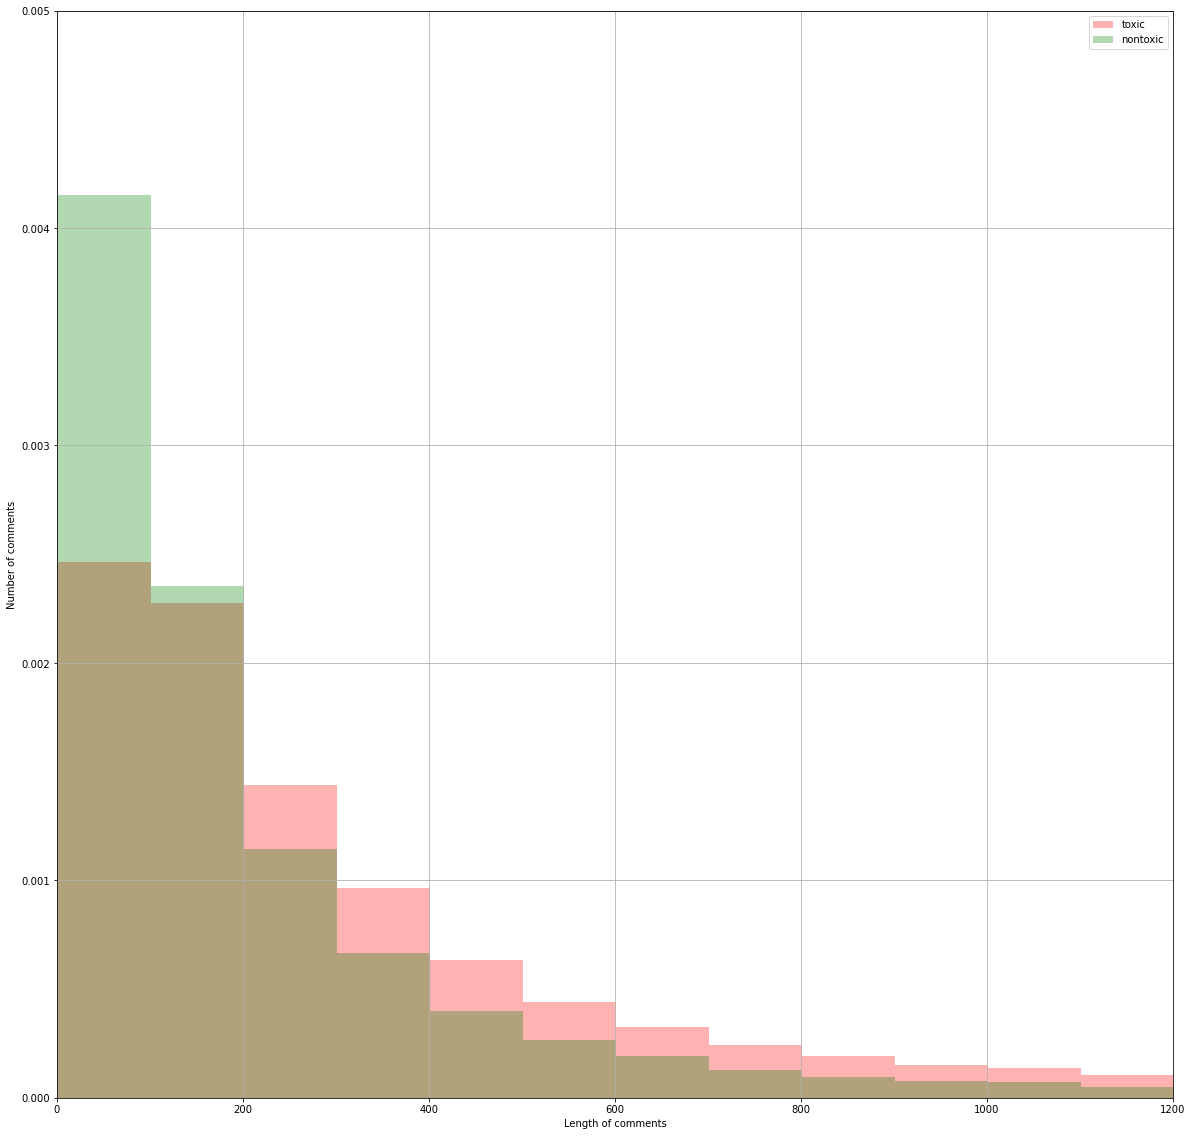

In [21]:
# Create the figure
plt.figure(figsize=(20,20))

# Get the data for the first plot
label = train[['istoxic']]
y = np.zeros(label.shape)
for ix in range(train['comment_text'].shape[0]):
    l = len(train['comment_text'][ix])
    if label['istoxic'].iloc[ix] == 0:
        y[ix][0] = l

# Create the first plot
plt.hist(y, bins=range(1, 8000, 100), label='toxic', color='red', density = True, alpha=0.3)

# Get the data for the second plot
label = train[['istoxic']]
y = np.zeros(label.shape)
for ix in range(train['comment_text'].shape[0]):
    l = len(train['comment_text'][ix])
    if label['istoxic'].iloc[ix] == 1:
        y[ix][0] = l

# Create the second plot
plt.hist(y, bins=range(1, 8000, 100), label='nontoxic', color='green', density = True, alpha=0.3)

# Set the x and y axis limits
plt.axis([0, 1200, 0, 0.005])

# Set the x and y labels
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')

# Add a legend
plt.legend()

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()